<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

**_Lecturer_**: **Christian Kuemmerle** - kuemmerle@jhu.edu

- Clustering problems
- $k$-means clustering
- Voronoi tesselation

<hr/>

<h1><font color="darkblue">Clustering</font></h1>

## Statistical Learning

- The methods in general fall in these 4 categories

>|                | Supervised     |         Unsupervised     |
 |----------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



### Unsupervised Learning

Unsupervised learning is a type of machine learning in which the algorithm is not provided with any pre-assigned labels or scores for the training data

>$\displaystyle T = \big\{ (x_i) \big\}$  where $x_i\in \mathbb{R}^d$ are feature sets .

#### Recall: Dimensionality Reduction

We learnt about **Principal Component Analysis (PCA)**, looking to find a low-dimensional representation of the observations that explain a good fraction of the variance.

For example: 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/440px-GaussianScatterPCA.svg.png" width=300 align=topleft>

## Clustering is ...
<img src="files/clusters.png" align=right width=200>

... the process of collecting a set of objects into groups or clusters of similar items

#### For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<img src="http://www.codeproject.com/KB/recipes/439890/clustering-process.png" width=450 align=left />

Populating the interactive namespace from numpy and matplotlib


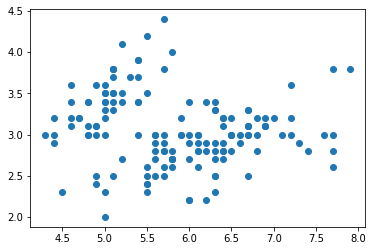

In [1]:
%pylab inline
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] 
# only the first 2 features

scatter(X[:,0],X[:,1]);

## Types of Algorithms

- **Flat Clustering**: Set of clusters without explicit structure that would related clusters to each other.

>1. Start with a random partitioning
>2. Iterate to improve the grouping

-> Focus of today's lecture: **k-means**

- **Hierarchical Clustering**: Introduces hierarchy between clusters.

>1. Greedy grouping of closest data points: bottom up. **Agglomorative Clustering**, e.g. [sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
>2. Greedy splitting of farthest: top down. **Divisive Clustering**

### Flat example

<img src="http://www.codeproject.com/KB/recipes/439890/clustering-process.png" width=450 align=left />

### Hierarchical example

> Set

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/250px-Clusters.svg.png width=150 align=center>

> Dendogram

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png width=250>

## $k$-means clustering

A simple (flat) algorithm. See also [user guide for k-means clustering in scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#k-means).


### k-means as optimization problem

Formally, the k-means algorithm (also called Lloyd's algorithm) is nothing but an alternating optimization over the following objective F.

For a set of data points $\{ x_i \}_{i=1}^n$ where $x_i \in \mathbb{R}^d$ for all $i$, we define
    
>   - $k$ centroids or prototypes $\mu_1,\ldots,\mu_k \in \mathbb{R}^d$ (which "represent" the "centers" of the $k$ clusters), and
>   - a partition $C_1 \cup C_2 \cup \ldots \cup C_k = \{1,\ldots,n\}$ (the $C_j$ are pairwise disjoint), where $C_j$ represents all data point indices which are part of cluster $j$.

The objective to minimize is then

$$ F\big(\{ \mu_j \}_{j=1}^k, (C_j)_{j=1}^k \big) = \sum_{j=1}^k \left[\ \sum_{x_i\in{}C_j}\ \lvert\!\lvert x_i-\mu_j\rvert\!\rvert^2 \right]. $$

For a given set of centroids $\mu_1,\ldots,\mu_k$, we update then
>$\displaystyle  \hat{{C}} = (\hat{{C}}_j)_{j=1}^k =  \underset{{{C} \text{ is partition}}}{\operatorname{argmin}} F\big(\{ \mu_j \}_{j=1}^k, (C_j)_{j=1}^k \big) = \underset{{{C} \text{ is partition}}}{\operatorname{argmin}} \sum_{j=1}^k \left[\ \sum_{x_i\in{}C_j}\ \lvert\!\lvert x_i-\mu_j\rvert\!\rvert^2 \right] $

and, subsequently, for a given, updated partition $(C_j)_{j=1}^k$, we update the centroids $\{ \mu_j \}_{j=1}^k$ such that 
> $\displaystyle (\hat{\mu}_1,\ldots,\hat{\mu}_k) = \underset{\{ \mu_j \}_{j=1}^k}{\operatorname{argmin}}    F\big(\{ \mu_j \}_{j=1}^k, (C_j)_{j=1}^k \big) =  \underset{\{ \mu_j \}_{j=1}^k}{\operatorname{argmin}}  \sum_{j=1}^k \left[\ \sum_{x_i\in{}C_j}\ \lvert\!\lvert x_i-\mu_j\rvert\!\rvert^2 \right]$

which leads for each $j=1,\ldots,k$ to the intra-cluster average
>$$\displaystyle  \hat{\mu}_j = \frac{1}{\lvert{C_j}\rvert}\sum_{x_i\in{}C_j} x_i.$$

### Algorithm

- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters

>1. Pick $k$ random objects as the initial $\mu_j$ prototypes
>0. Find for each data point $x_i$ the closest prototype $\mu_j$ and assign to that cluster $C_j$
>0. Calculate the averages for each cluster $C_j$ to get new $\mu_j$
>0. Repeat until convergence

Step 2. and 3. are the steps above described in formulas.

- Often very fast - but no proof

In scikit-learn:

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

### Animation

<img src=files/kmeans.gif>

- Click on these <a href=http://shabal.in/visuals/kmeans/1.html>animations</a> to see the process of $k$-means clustering in action
 
> Starting from different points...

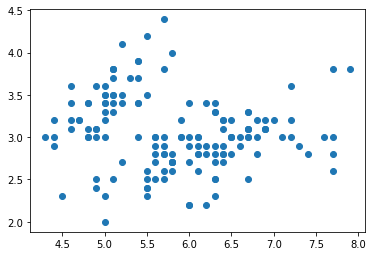

In [2]:
figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1]);

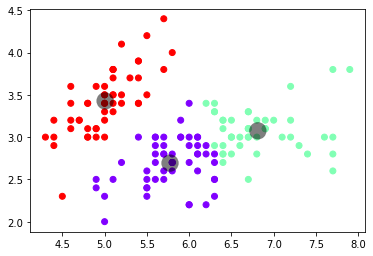

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=3, n_init=100)
kmeans.fit(X)

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=cm.rainbow);

C = kmeans.cluster_centers_
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

In [4]:
np.c_[xx.ravel(), yy.ravel()]

NameError: name 'xx' is not defined

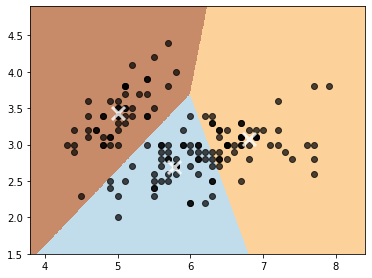

In [5]:
# Step size of the mesh. 
h = .005    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() -.5, X[:, 0].max() +.5
y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() +.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
P = P.reshape(xx.shape)
figure(figsize=(6,6)); subplot(111,aspect='equal')
plt.clf()

plt.imshow(P, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c='k', alpha=0.7)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, alpha=0.8)

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);

## Detour: Voronoi Tessellation & Delaunay Triangulation

- _Voronoi tessellation_: Color areas according to which $\mu_j$ is closest

- _Delaunay triangulation_: Define a triangulation from triangles defined by the $\mu_j$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/1200px-Euclidean_Voronoi_diagram.svg.png" alt="Euclidean Voronoi diagram.svg" align=left width=400>

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

<img src="https://files.realpython.com/media/centroids_iterations.247379590275.gif" alt="k-means algorithm" align=left width=400>

### k-means++ (default initialization in [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))

- Choose one center $\mu_1$ uniformly at random among the data points.
- For each data point $x$ not chosen yet, compute $D(x)$, the distance between $x$ and the nearest center $\mu_i$   that has already been chosen.
- Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to $D(x)^2$.
- Repeat Steps 2 and 3 until $k$ centers have been chosen.
- Now that the initial centers have been chosen, proceed using standard k-means clustering.

Alternative: Choose input parameter `init='random'` for random initialization.

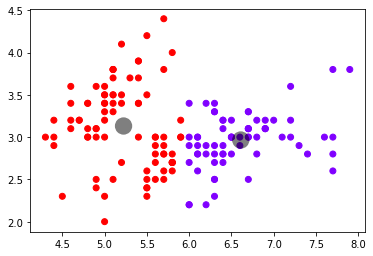

In [6]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=100)
kmeans.fit(X)

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=cm.rainbow);

C = kmeans.cluster_centers_
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

Potential issue:

- K-means assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

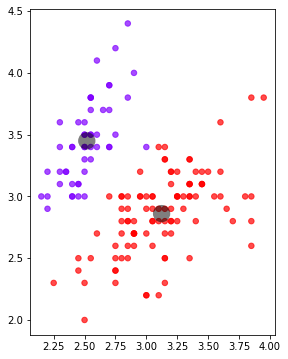

In [7]:
# transformations might help
Z = X.copy()
Z[:,0] *= 0.5 #processing to better shape the data. 

kmeans = KMeans(n_clusters=2,n_init=100,init='k-means++')
kmeans.fit(Z)
C, L = kmeans.cluster_centers_, kmeans.labels_

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(Z[:,0],Z[:,1],c= L, marker='o',s= 30,alpha=0.7,cmap=cm.rainbow);
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

Through this simple transformation, the cluster assignment has changed!

In [8]:
kmeans.inertia_

30.063975000000013

In [9]:
kmeans.score(Z)

-30.063975

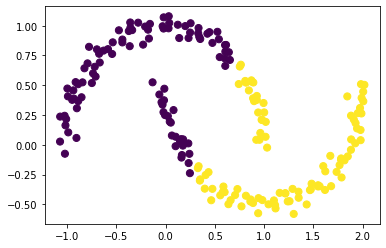

In [10]:
# k-means is limited to linear cluster boundaries. In this example, it doesn't cluster correctly.
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Problem mitigated by other clustering methods: Kernel transformation, spectral clustering

## What $k$?

- How many clusters?

> Too many? <br/>
> Too few?

- Various diagnostics

> Check the minimum value of the cost function? <br/>
> Characterize the clusters - Gaussian? spherical?

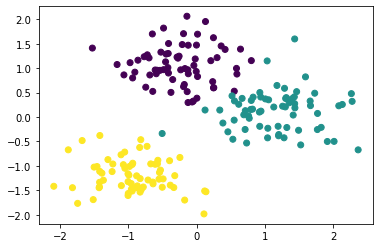

In [11]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 100 not perfectly separable points
X, y = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y);

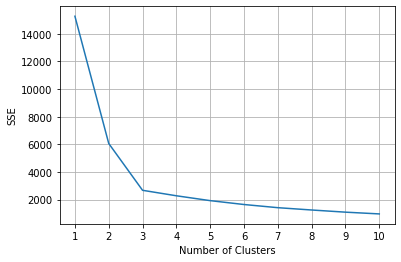

In [12]:
sse = [] # A list holds the SSE values for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid()
plt.show()

- Elbow Method
>
>Select the value of $k$ at the elbow, i.e., the point after which the minimum of distortion value starts to decrease slowly.

In [13]:
# pip install kneed

In [14]:
from kneed import KneeLocator
kl = KneeLocator( range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

- Silhouette Method: [silhouette coefficient](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) values range between -1 and 1 and quantifies how well a data point fits into its assigned cluster based on two factors:

> How close the data point is to other points in the cluster
>
> How far away the data point is from points in other clusters

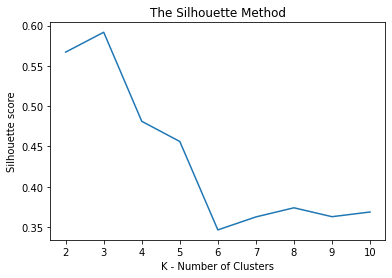

In [15]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
    
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Lineplot using silhouette score
plt.plot(range(2, 11), silhouette_scores) 
plt.xlabel('K - Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('The Silhouette Method') 
plt.show()

## Exercise

- Run $k$-means on this [CSV](files/Class-Clusters.csv) file
- Try different parameters
- How many clusters did you find?

(200, 3)

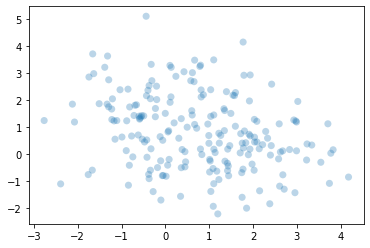

In [17]:
X = loadtxt('Class-Clusters.csv', delimiter=',')
scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');
X.shape

## $k$-medians clustering

Replace mean with median for cluster centers: Instead of (squared) Euclidean distance ($L_2$), use Taxicab ($L_1$) distance.